In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('mobile_sales_data.csv')

In [2]:
df['Inward Date'] = pd.to_datetime(df['Inward Date'])
df['Dispatch Date'] = pd.to_datetime(df['Dispatch Date'])

df['Processing Time'] = (df['Dispatch Date'] - df['Inward Date']).dt.days


print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values in specifications (replace N/A with 'Not Specified')
spec_cols = ['Core Specification', 'Processor Specification', 'RAM', 'ROM', 'SSD']
for col in spec_cols:
    df[col] = df[col].replace('N/A', 'Not Specified')

# Check data types
print("\nData types:")
print(df.dtypes)

Missing values per column:
Product                        0
Brand                          0
Product Code                   0
Product Specification          0
Price                          0
Inward Date                    0
Dispatch Date                  0
Quantity Sold                  0
Customer Name                  0
Customer Location              0
Region                         0
Core Specification         24983
Processor Specification        0
RAM                            0
ROM                            0
SSD                        24983
Processing Time                0
dtype: int64

Data types:
Product                            object
Brand                              object
Product Code                       object
Product Specification              object
Price                               int64
Inward Date                datetime64[ns]
Dispatch Date              datetime64[ns]
Quantity Sold                       int64
Customer Name                      object
Customer

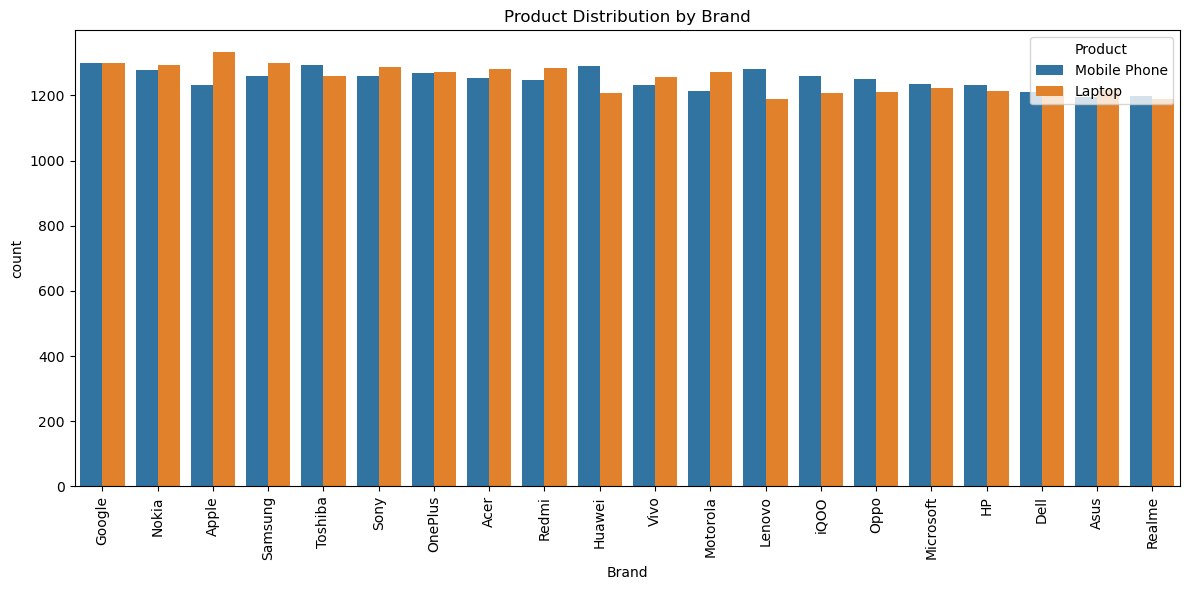

In [4]:
# Product distribution by brand
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Brand', hue='Product', order=df['Brand'].value_counts().index)
plt.title('Product Distribution by Brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

2. Top Selling Brands

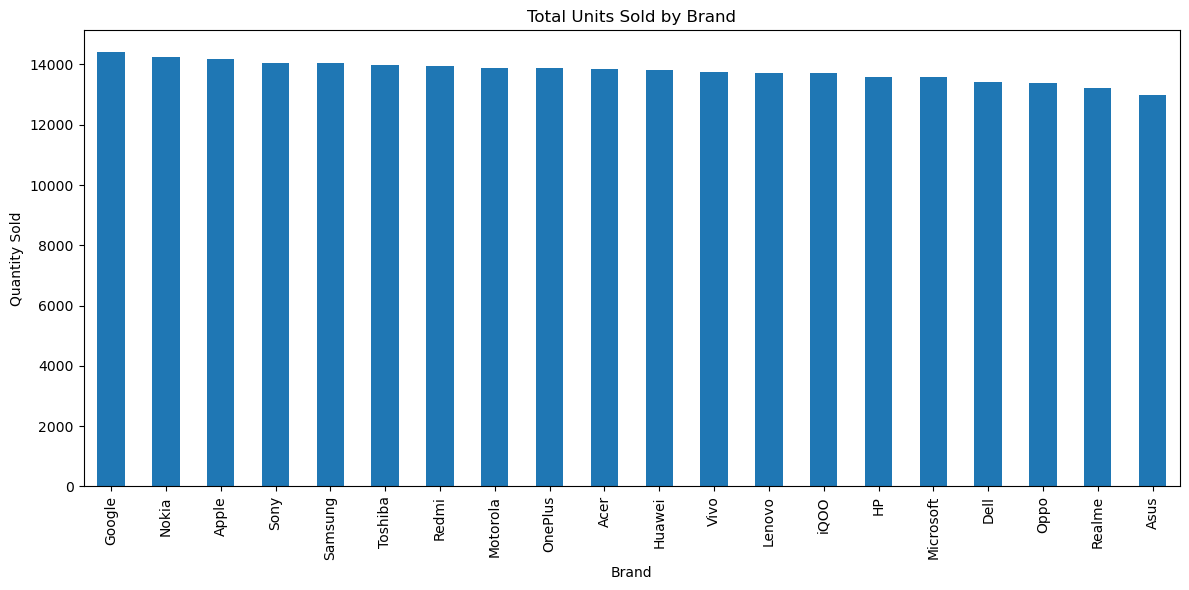

In [6]:
# Top selling brands by quantity
brand_sales = df.groupby('Brand')['Quantity Sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
brand_sales.plot(kind='bar')
plt.title('Total Units Sold by Brand')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

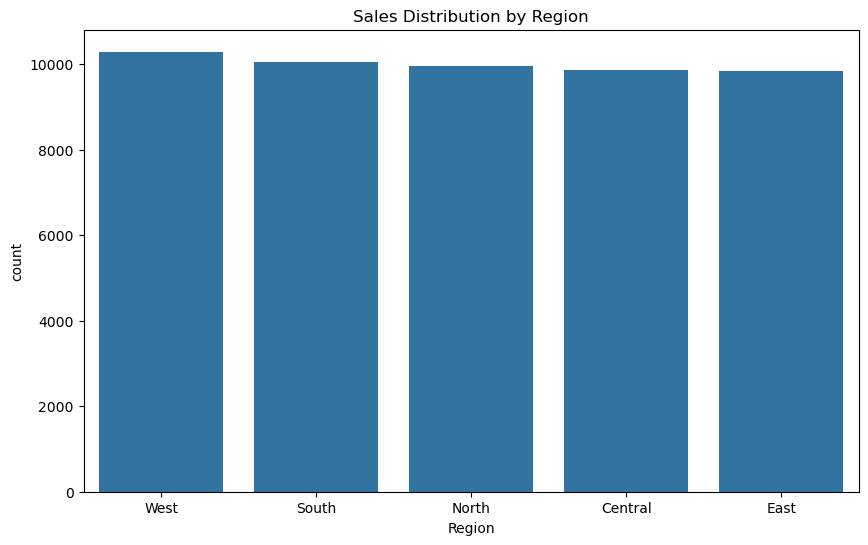

In [7]:
# Sales by region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Sales Distribution by Region')
plt.show()



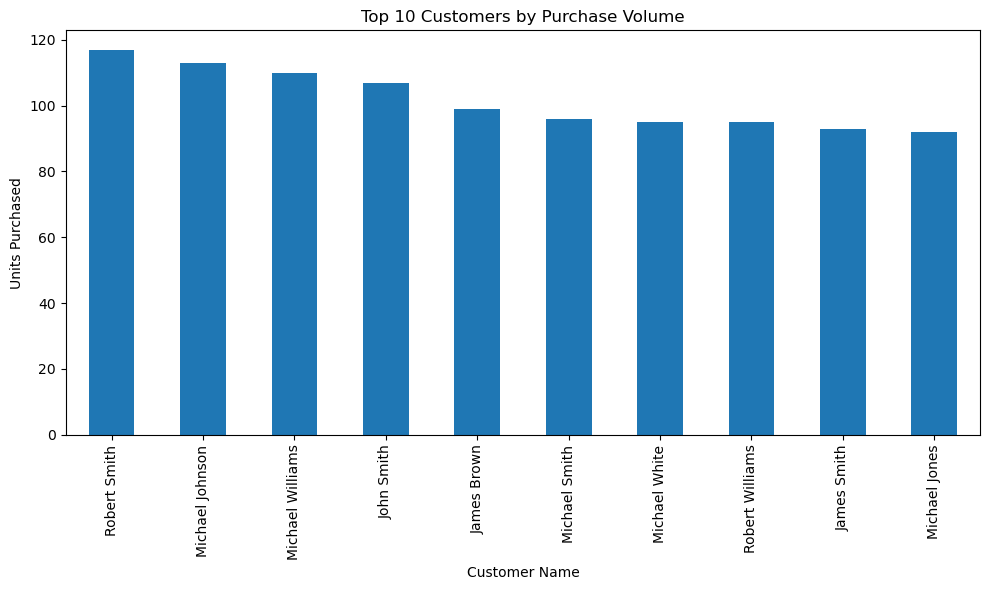

In [8]:
# Top customers by purchase volume
top_customers = df.groupby('Customer Name')['Quantity Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Purchase Volume')
plt.ylabel('Units Purchased')
plt.tight_layout()
plt.show()

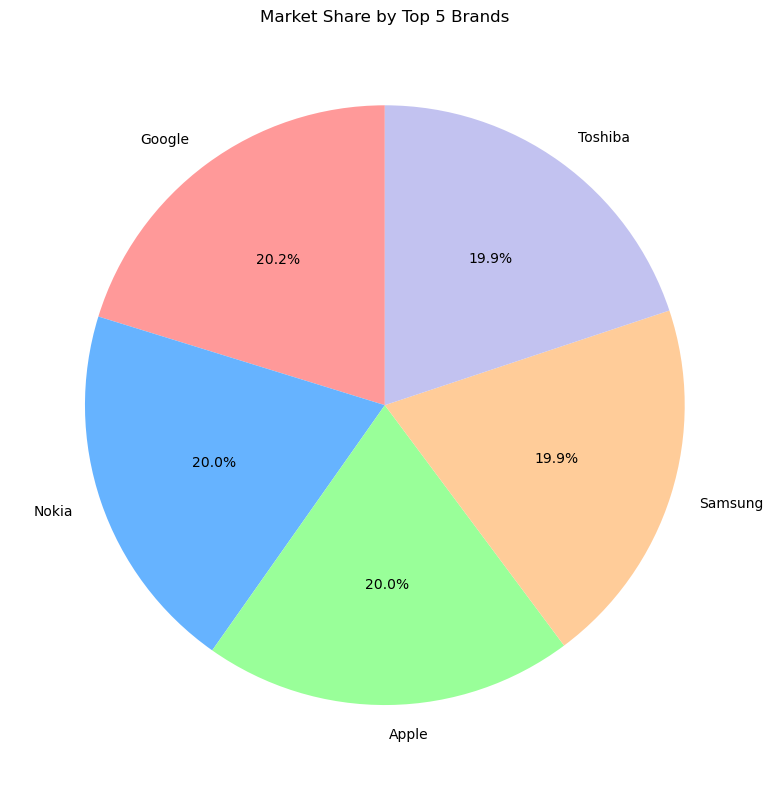

In [9]:
# Market share by brand (top 5)
top_brands = df['Brand'].value_counts().head(5)
plt.figure(figsize=(8, 8))
top_brands.plot(kind='pie', autopct='%1.1f%%', 
               colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],
               startangle=90)
plt.title('Market Share by Top 5 Brands')
plt.ylabel('')
plt.tight_layout()
plt.show()

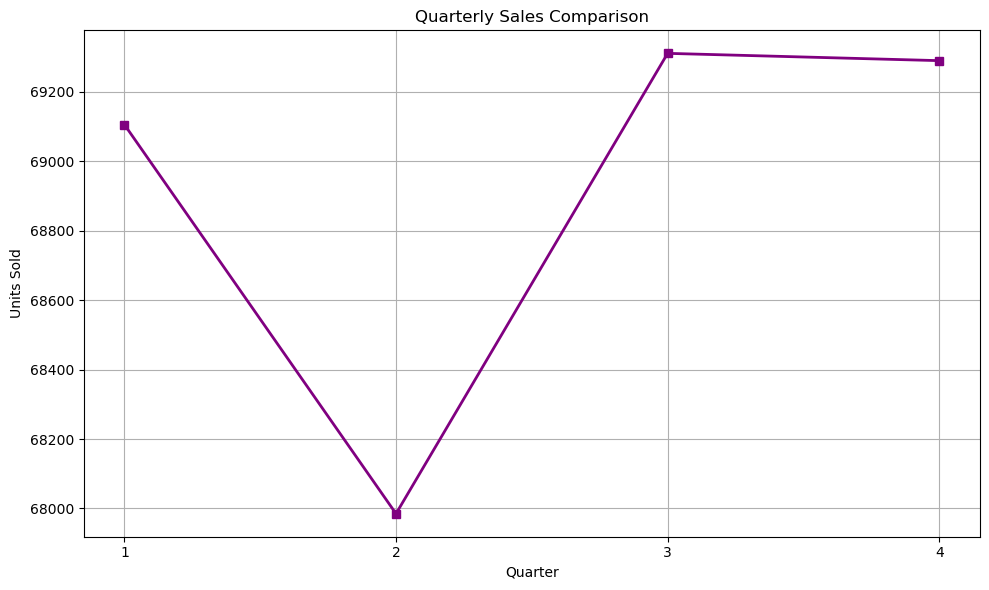

In [10]:
# Quarterly sales comparison
df['Quarter'] = df['Inward Date'].dt.quarter
quarterly_sales = df.groupby('Quarter')['Quantity Sold'].sum()

plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='line', marker='s', color='purple', linewidth=2)
plt.title('Quarterly Sales Comparison')
plt.xlabel('Quarter')
plt.ylabel('Units Sold')
plt.xticks([1, 2, 3, 4])
plt.grid(True)
plt.tight_layout()
plt.show()

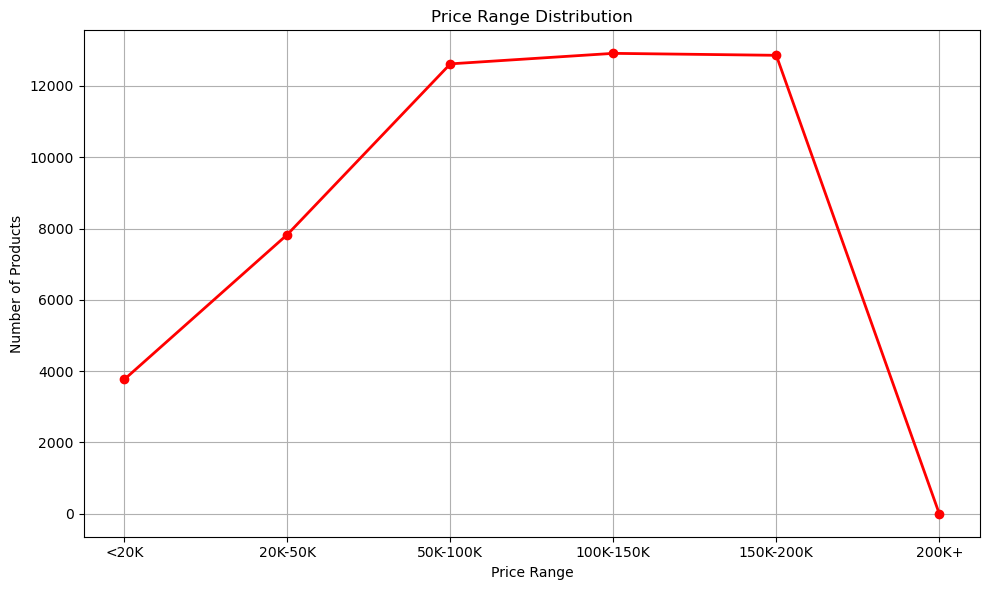

In [11]:
# Price range distribution
price_bins = [0, 20000, 50000, 100000, 150000, 200000, 250000]
price_labels = ['<20K', '20K-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
df['Price Range'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

price_dist = df['Price Range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
price_dist.plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()